
Gradient Boosting Optimisé - Performance:
Accuracy: 0.8126330731014905
ROC AUC Score: 0.8657071951307876
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1036
        True       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



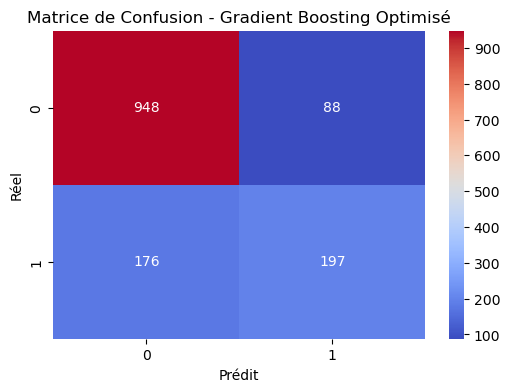


Modèle Gradient Boosting optimisé sauvegardé!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

# Charger le dataset
df = pd.read_csv("/Users/thomaspham/Documents/final_Project/data/raw/customer_churn_telecom_services.csv")

# Prétraitement des données
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Encodage des variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Séparation des features et de la target
X = df.drop(columns=["Churn_Yes"])
y = df["Churn_Yes"]

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des variables numériques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Optimisation de Gradient Boosting avec GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Meilleur modèle après optimisation
best_model = grid_search.best_estimator_

# Évaluation du modèle
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nGradient Boosting Optimisé - Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title('Matrice de Confusion - Gradient Boosting Optimisé')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Sauvegarde du modèle
joblib.dump(best_model, "../deployment/gradient_boosting_model.pkl")
print("\nModèle Gradient Boosting optimisé sauvegardé!")

